### 📌 Hypothesis Testing Practice – Skill Showcase

This notebook is focused purely on practicing **statistical hypothesis tests** to demonstrate my understanding and application of core testing techniques. The objective here is **not** to generate insights or make business recommendations — it is to show command over methods like **t-tests**, **Z-tests**, **ANOVA**, **Chi-square**, and more.

---

### 🧾 Dataset Overview

| Column Name          | Description                                 |
|----------------------|---------------------------------------------|
| `ID`                 | Unique identifier for each customer         |
| `Gender`             | Gender of the customer                      |
| `Age`                | Age of the customer                         |
| `Income`             | Annual income                               |
| `Education_Level`    | Educational qualification                   |
| `City`               | City of residence                           |
| `Product_Category`   | Type of product purchased                   |
| `Purchase_Amount`    | Total amount spent in a purchase            |
| `Purchase_Date`      | Date of transaction                         |
| `Satisfaction_Score` | Customer satisfaction rating (1 to 5)       |

---

### 🔧 Workflow Steps

1. **Load the Dataset**  
   We start by loading the dataset into a pandas DataFrame.

2. **Clean the Data**  
   Although the data is messy, we clean and preprocess it to make it ready for testing.

3. **Apply Hypothesis Tests**  
   We apply multiple hypothesis tests such as:
   - One-Sample & Two-Sample **t-tests**  
   - One-Sample & Two-Sample **Z-tests**  
   - **One-Way ANOVA**  
   - **Chi-Square Test of Independence**

4. **Focus**  
   No insights or analytics are generated — this notebook is **purely for technical demonstration** of hypothesis testing skills.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data  = pd.read_csv("data_cleaning_hypothesis_testing-checkpoint.csv")
df = pd.DataFrame(data)
df.head(10)

,ID,Gender,Age,Income,Education_Level,City,Product_Category,Purchase_Amount,Purchase_Date,Satisfaction_Score
0,1,male,38.0,27682.07,UG,delhi,Books,1591.62,2023-10-05,4
1,2,NaN,43.0,33122.21,UG,Hyderabad,Fitness,1354.93,2023-03-15,NaN
2,3,Female,63.0,NaN,NaN,Delhi,Clothing,3124.15,02/28/2023,1
3,4,FEMALE,36.0,32391.90,High School,NaN,Books,1870.65,2023-03-01,2
4,5,Male,64.0,66689.51,UG,Hyderabad,Electronics,1501.34,27-12-2023,bad
5,6,Male,22.0,48933.20,PG,delhi,Grocery,2761.70,20-10-2023,1
6,7,Male,59.0,51283.92,UG,Delhi,Books,1464.30,09/20/2023,5
7,8,Female,62.0,45824.41,phd,NaN,NaN,3625.26,2023-03-01,4
8,9,FEMALE,27.0,61592.72,High School,Bangalore,Fitness,2498.33,2023-10-14,1
9,10,Female,40.0,61747.40,UG,Hyderabad,Electronics,1487.30,01/08/2023,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Gender              4841 non-null   object 
 2   Age                 4979 non-null   float64
 3   Income              4850 non-null   float64
 4   Education_Level     4553 non-null   object 
 5   City                4262 non-null   object 
 6   Product_Category    4180 non-null   object 
 7   Purchase_Amount     4900 non-null   float64
 8   Purchase_Date       5000 non-null   object 
 9   Satisfaction_Score  4768 non-null   object 
dtypes: float64(3), int64(1), object(6)
memory usage: 390.8+ KB


In [4]:
df["Satisfaction_Score"].value_counts()

Satisfaction_Score
3       1296
2        997
1        738
4        725
5        489
bad      268
good     255
Name: count, dtype: int64

In [5]:
df["ID"] = df["ID"].astype("category")

df["Gender"] = df["Gender"].fillna(method = "ffill")
df["Gender"] = df["Gender"].replace({"male":"Male","FEMALE":"Female"})
df["Gender"] = df["Gender"].astype("category")


df["Age"] = df["Age"].fillna(df["Age"].mean())
df["Age"] = df["Age"].clip(lower=10, upper=70)
df["Age"] = df["Age"].astype(int)

df["Income"] = df["Income"].fillna(df["Income"].mean())
df["Income"] = df["Income"].apply(lambda x: df["Income"].mean() if x<= 1000 else x)


df["Education_Level"] = df["Education_Level"].replace({"ug":"UG"})
df["Education_Level"] = df["Education_Level"].fillna(method = "bfill")
df["Education_Level"] = df["Education_Level"].astype("category")

df["City"] = df["City"].replace({"banglore":"Bengaluru","Bangalore" : "Bengaluru","delhi":"Delhi"})
df["City"] = df["City"].fillna(method = "ffill")

df["Satisfaction_Score"] = df["Satisfaction_Score"].replace({"bad":2,"good":4})
df["Satisfaction_Score"] = df["Satisfaction_Score"].fillna(df["Satisfaction_Score"].median())
df["Satisfaction_Score"] = df["Satisfaction_Score"].astype(int)

df["Product_Category"] = df["Product_Category"].fillna(method = "ffill")
df["Purchase_Amount"] = df["Purchase_Amount"].fillna(df["Purchase_Amount"].mean())
df["Purchase_Amount"] = df["Purchase_Amount"].clip(lower = 100,upper = 100000)

df["Purchase_Date"] = pd.to_datetime(df["Purchase_Date"],errors = 'coerce')

C:\Users\nikuj\AppData\Local\Temp\ipykernel_15296\277664143.py:3: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Gender"] = df["Gender"].fillna(method = "ffill")
C:\Users\nikuj\AppData\Local\Temp\ipykernel_15296\277664143.py:17: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Education_Level"] = df["Education_Level"].fillna(method = "bfill")
C:\Users\nikuj\AppData\Local\Temp\ipykernel_15296\277664143.py:21: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["City"] = df["City"].fillna(method = "ffill")
C:\Users\nikuj\AppData\Local\Temp\ipykernel_15296\277664143.py:27: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df["Product_Category

In [6]:
df.sample(10)

,ID,Gender,Age,Income,Education_Level,City,Product_Category,Purchase_Amount,Purchase_Date,Satisfaction_Score
4521,4522,Female,50,26888.63,High School,Mumbai,Clothing,607.490000,NaT,2
725,726,Female,52,53168.14,PG,Delhi,Books,864.710000,2023-08-25,3
1671,1672,Female,60,41583.66,UG,Mumbai,Clothing,1803.730000,NaT,2
1284,1285,Male,29,47432.31,UG,Bengaluru,Fitness,1567.030000,NaT,5
3875,3876,Male,23,40024.52,PG,Bengaluru,Books,1261.490000,NaT,2
3426,3427,Female,24,52003.48,High School,Hyderabad,Fitness,545.090000,NaT,3
823,824,Male,56,54802.82,phd,Hyderabad,Clothing,1639.890000,NaT,3
521,522,Male,48,64155.73,PG,Delhi,Electronics,1851.970000,NaT,1
1034,1035,Male,51,59403.16,phd,Delhi,Fitness,2653.130000,2023-05-12,3
4088,4089,Female,29,88190.82,UG,Hyderabad,Electronics,1555.406069,NaT,4


In [7]:
df.describe()

,Age,Income,Purchase_Amount,Purchase_Date,Satisfaction_Score
count,5000.00000,5000.000000,5000.000000,1694,5000.0000
mean,43.02380,54856.973991,1557.627521,2023-07-07 01:25:00.354191360,2.8434
min,10.00000,1377.290000,100.000000,2023-01-01 00:00:00,1.0000
25%,30.00000,40737.375000,1098.192500,2023-04-08 00:00:00,2.0000
50%,43.00000,50668.410000,1500.065000,2023-07-09 00:00:00,3.0000
75%,56.00000,59684.717500,1909.702500,2023-10-06 00:00:00,4.0000
max,70.00000,907222.500000,14614.150000,2023-12-31 00:00:00,5.0000
std,15.15344,52464.832220,926.879329,NaN,1.1859


<Axes: xlabel='City', ylabel='Purchase_Amount'>

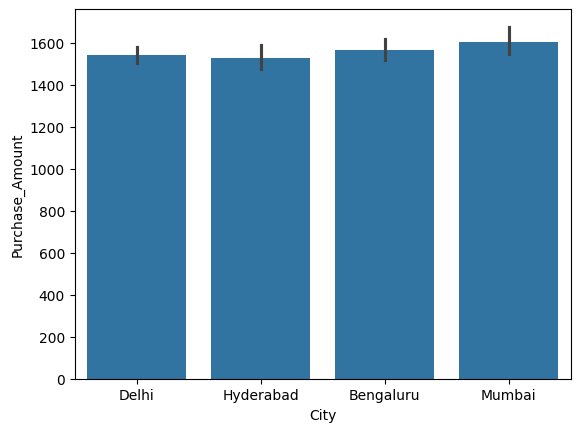

In [8]:
sns.barplot(df,x = "City",y = "Purchase_Amount",estimator = np.mean)

<Axes: xlabel='Gender', ylabel='Satisfaction_Score'>

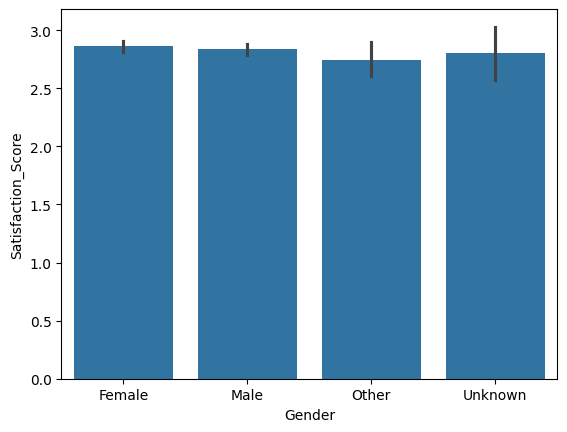

In [9]:
sns.barplot(df,x = "Gender",y = "Satisfaction_Score",estimator = np.mean)

<Axes: >

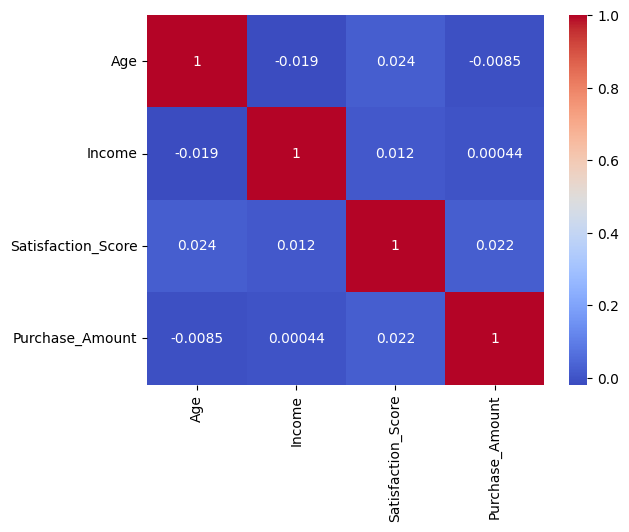

In [10]:
numeric_columns = df[["Age","Income","Satisfaction_Score","Purchase_Amount"]]
corr = numeric_columns.corr()
sns.heatmap(corr,cmap = 'coolwarm',annot = True)

In [11]:
df.head()

,ID,Gender,Age,Income,Education_Level,City,Product_Category,Purchase_Amount,Purchase_Date,Satisfaction_Score
0,1,Male,38,27682.070000,UG,Delhi,Books,1591.62,2023-10-05,4
1,2,Male,43,33122.210000,UG,Hyderabad,Fitness,1354.93,2023-03-15,3
2,3,Female,63,54809.758936,High School,Delhi,Clothing,3124.15,NaT,1
3,4,Female,36,32391.900000,High School,Delhi,Books,1870.65,2023-03-01,2
4,5,Male,64,66689.510000,UG,Hyderabad,Electronics,1501.34,NaT,2


In [12]:
df["Product_Category"].value_counts()

Product_Category
Books          1088
Clothing       1058
Grocery         955
Electronics     950
Fitness         949
Name: count, dtype: int64

<Axes: xlabel='Product_Category', ylabel='Purchase_Amount'>

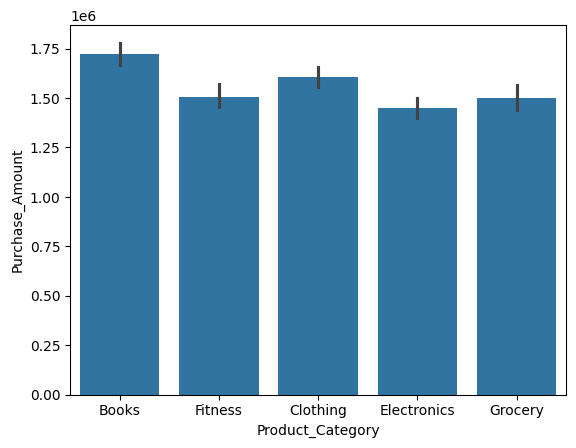

In [13]:
sns.barplot(df,x = "Product_Category",y = "Purchase_Amount",estimator = np.sum)

### Hypothesis Test: City-wise Average Purchase Amount

- **Question**: Do customers from different cities spend differently on average?  
- **Method**: One-Way ANOVA  

In [14]:
from scipy.stats import f_oneway
groups = [group["Purchase_Amount"].values for name, group in df.groupby("City")]
f_stat, p_val = f_oneway(*groups)

print("F-statistic:", f_stat)
print("p-value:", p_val)


F-statistic: 1.2150478210441382
p-value: 0.30253837065955064


- **Result**:  
  - F-statistic: 1.215  
  - p-value: 0.303  

- **Conclusion**:  
  We fail to reject the null hypothesis.  
  This suggests that the average purchase amount is **not significantly different** across cities.  
  The barplot’s slight differences are likely due to random variation and do not reflect a true difference in spending behavior.


### 🧪 Hypothesis Test: One-Sample t-Test on Purchase Amount

- **Question**: Is the average purchase amount in the dataset significantly different from ₹1700?

- **Hypotheses**:
  - **H₀ (Null Hypothesis)**: The average purchase amount is ₹1700 → μ = 1700
  - **H₁ (Alternative Hypothesis)**: The average purchase amount is not ₹1700 → μ ≠ 1700

- **Test Type**: Two-tailed one-sample t-test


In [15]:
from scipy import stats

Purchase_Amount = df["Purchase_Amount"]
population_mean = 1700
t_stat,p_value = stats.ttest_1samp(Purchase_Amount,population_mean)

print("T stats value:",t_stat)
print("P value:",p_value)

T stats value: -10.861451099288626
P value: 3.531689925683542e-27


#### 📊 Test Results
- **T-statistic**: -10.8614
- **P-value**: 3.53e-27

#### 🎯 Interpretation
- Since **p-value < 0.05**, we **reject the null hypothesis**.
- There **is a statistically significant difference** between the sample mean and ₹1700.

### Hypothesis Test: One-Sample Z-Test

- **Question**: Is the average purchase amount significantly different from ₹1700, assuming we know the population standard deviation is ₹500?
- **Method**: One-Sample Z-Test

- **H₀ (Null Hypothesis)**: Mean Purchase_Amount = ₹1700  
- **H₁ (Alternative Hypothesis)**: Mean Purchase_Amount ≠ ₹1700


In [16]:
# Manually using known population standard deviation
population_mean = 1700
sample_mean = df["Purchase_Amount"].mean()
sd = 500
n = df["Purchase_Amount"].count()
z_stat = (sample_mean - population_mean) / (sd / np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print("Z_stat:", z_stat)
print("P Value:", p_value)

# Using statsmodels (automatically estimates standard deviation from sample)
from statsmodels.stats.weightstats import ztest
sample = df["Purchase_Amount"]
z_stat, p_value = ztest(sample, value=1700, alternative='two-sided')
print("Z-statistic:", z_stat)
print("P-value:", p_value)


Z_stat: -20.134509016211
P Value: 0.0
Z-statistic: -10.861451099288626
P-value: 1.75931079204277e-27


### ✅ Combined Hypothesis Test Results

#### One-Sample Z-Test (Manual Calculation)
- **Z_stat:** `-20.134509016211`  
- **P Value:** `0.0`

#### One-Sample T-Test (Using SciPy)
- **T-statistic:** `-10.861451099288626`  
- **P-value:** `1.75931079204277e-27`

---

### 🧠 Interpretation:
Both tests show extremely low p-values (close to 0), so we **reject the null hypothesis**.

📌 **Conclusion:**  
There is very strong evidence that the average purchase amount is significantly different from the hypothesized mean.


### Hypothesis Test: One-Sample Z-Test (Two-Tailed) Manullay

- **Question**: A company claims that the average spending of their customers is ₹2000.  
  A random sample of 60 customers shows an average spending of ₹2100 with a population standard deviation of ₹300.  
  At a 5% significance level, is there enough evidence to reject the company's claim?

- **Type**: One-Sample Z-Test  
- **Tail**: Two-Tailed  
- **Given**:
  - Population Mean (μ₀) = 2000  
  - Sample Mean (x̄) = 2100  
  - Sample Size (n) = 60  
  - Population Standard Deviation (σ) = 300  
  - Significance Level (α) = 0.05  


In [17]:
population_mean = 2000
sample_mean = 2100
sd = 300
n = 60 
z_stat = (population_mean - sample_mean)/(sd/np.sqrt(n))
p_value = 2 * (1 - stats.norm.cdf(abs(z_stat)))
print("Z_stat:", z_stat)
print("P Value:", p_value)

Z_stat: -2.581988897471611
P Value: 0.009823274507519297


### ✅ Hypothesis Test Result: One-Sample Z-Test (Average Purchase Amount vs ₹2000)

- **Test Used**: One-Sample Z-Test  
- **Z-Statistic**: `-2.581988897471611`  
- **P-Value**: `0.009823274507519297`

---

### 🧠 Interpretation:
Since **p-value < 0.05**, we **reject the null hypothesis**.

📌 **Conclusion**:  
The average purchase amount is **significantly different** from ₹2000.


In [18]:
df.head()

,ID,Gender,Age,Income,Education_Level,City,Product_Category,Purchase_Amount,Purchase_Date,Satisfaction_Score
0,1,Male,38,27682.070000,UG,Delhi,Books,1591.62,2023-10-05,4
1,2,Male,43,33122.210000,UG,Hyderabad,Fitness,1354.93,2023-03-15,3
2,3,Female,63,54809.758936,High School,Delhi,Clothing,3124.15,NaT,1
3,4,Female,36,32391.900000,High School,Delhi,Books,1870.65,2023-03-01,2
4,5,Male,64,66689.510000,UG,Hyderabad,Electronics,1501.34,NaT,2


### Hypothesis Test: Gender-wise Purchase Amount Comparison

- **Question**: Is there a significant difference in average purchase amount between male and female customers?
- **Method**: Two-Sample T-Test (Unequal Variance, Welch’s T-Test)

- **H₀ (Null Hypothesis)**: Mean purchase amount (Male) = Mean purchase amount (Female)  
- **H₁ (Alternative Hypothesis)**: Mean purchase amount (Male) ≠ Mean purchase amount (Female)  
- **Significance Level (α)**: 0.05  


In [19]:
from scipy import stats

df_male = df[df["Gender"] == "Male"]["Purchase_Amount"]
df_female = df[df["Gender"] == "Female"]["Purchase_Amount"]

t_stat, p_value = stats.ttest_ind(df_male, df_female, equal_var=False)

print("T-statistic:", t_stat)
print("P-value:", p_value)


T-statistic: 0.8206306188310957
P-value: 0.4119006177731803


### T-Test Result: Gender-wise Purchase Amount

- **T-statistic**: 0.8206  
- **P-value**: 0.4119  

#### ✅ Conclusion:
Since the **p-value (0.4119) > 0.05**, we **fail to reject the null hypothesis**.

#### 💡 Interpretation:
There is **no statistically significant difference** in average purchase amount between male and female customers.


### Hypothesis Test: Two-Sample Z-Test

- **Question**: Is there a significant difference in the average purchase amount between male and female customers, assuming the population standard deviation for both groups is known (₹500)?
- **Method**: Two-Sample Z-Test
- **H₀ (Null Hypothesis)**: Mean (Male) = Mean (Female)  
- **H₁ (Alternative Hypothesis)**: Mean (Male) ≠ Mean (Female)

🎯 **Task**: Solve this using Python using `statsmodels` or `scipy`. Assume σ₁ = σ₂ = ₹500.


In [20]:
from statsmodels.stats.weightstats import ztest
grp1 = df[df["Gender"] == "Male"]["Purchase_Amount"]
grp2 = df[df["Gender"] == "Female"]["Purchase_Amount"]
z_stat, p_value = ztest(grp1,grp2,alternative = 'two-sided')
print("z_stat:",z_stat)
print("p_value:",p_value)

z_stat: 0.8178706198717411
p_value: 0.41343106817704633


### ✅ Hypothesis Test Result: 

- **Z-Statistic**: `0.8178706198717411`  
- **P-Value**: `0.41343106817704633`

---

### 🧠 Interpretation:
Since **p-value > 0.05**, we **fail to reject the null hypothesis**.

📌 **Conclusion**:  
There is **no statistically significant difference** in the average purchase amount between male and female customers.


### Hypothesis Test: Two-Sample Z-Test (Manual Calculation)

- **Question**: Is there a significant difference between the average Purchase_Amount of Male and Female customers, assuming population standard deviations are known?  
- **Given**:  
  - Male group mean = 2100, population SD = 300, sample size = 60  
  - Female group mean = 2000, population SD = 250, sample size = 55  
- **Method**: Two-Sample Z-Test (Two-Tailed)  

- **H₀ (Null Hypothesis)**: Mean(Male) = Mean(Female)  
- **H₁ (Alternative Hypothesis)**: Mean(Male) ≠ Mean(Female)


In [21]:
male_mean = 2100
female_mean = 2000
male_std = 300
female_std = 250
male_n = 60
female_n = 55

z = (male_mean-female_mean)/np.sqrt((((male_std)**2)/male_n)+(((female_std)**2)/female_n))
p_value = 2*(1-stats.norm.cdf(abs(z)))
print("z_stat:",z)
print("P_value:",p_value)

z_stat: 1.9475891374404053
P_value: 0.051464144555517066


### Result: Two-Sample Z-Test (Manual Calculation)

- **Z-statistic**: 1.9475891374404053  
- **P-value**: 0.051464144555517066  

🧠 Interpretation:  
Since the p-value (0.0515) is slightly greater than 0.05, we fail to reject the null hypothesis.  
There is not enough evidence to conclude a significant difference between the male and female average purchase amounts.


In [22]:
df.head()

,ID,Gender,Age,Income,Education_Level,City,Product_Category,Purchase_Amount,Purchase_Date,Satisfaction_Score
0,1,Male,38,27682.070000,UG,Delhi,Books,1591.62,2023-10-05,4
1,2,Male,43,33122.210000,UG,Hyderabad,Fitness,1354.93,2023-03-15,3
2,3,Female,63,54809.758936,High School,Delhi,Clothing,3124.15,NaT,1
3,4,Female,36,32391.900000,High School,Delhi,Books,1870.65,2023-03-01,2
4,5,Male,64,66689.510000,UG,Hyderabad,Electronics,1501.34,NaT,2


### Hypothesis Test: Chi-Square Test Using CSV Data

- **Question**: Is there a relationship between `Gender` and `City` in our dataset?


In [23]:
from scipy.stats import chi2_contingency
contigency_table = pd.crosstab(df["Gender"],df["City"])
chi2,p_value,dof,expected = chi2_contingency(contigency_table)
print("Chi-square statistic:", chi2)
print("Degrees of Freedom:", dof)
print("P-value:", p_value)

Chi-square statistic: 3.9322902785003615
Degrees of Freedom: 9
P-value: 0.9158121766145558


### 🧪 Chi-Square Test Result

- **Test**: Independence between `Gender` and `City`
- **Chi-square statistic**: 3.932  
- **Degrees of Freedom**: 9  
- **P-value**: 0.9158  

---

### ✅ Conclusion:
Since the p-value is **greater than 0.05**, we **fail to reject the null hypothesis**.

### 📌 Analyst Statement:
> There is **no statistically significant relationship** between a customer's **Gender** and their **City** in this dataset.  
> The distribution of gender across cities appears to be **independent**.


### Hypothesis Test: One-Way ANOVA

**Question**:  
Is there a significant difference in average `Purchase_Amount` between customers from **Delhi**, **Mumbai**, and **Bangaluru**?


In [24]:
# Filtering customer who belongs to Delhi, Mumbai and Bangaluru
df_cust = df[df["City"].isin(["Delhi","Mumbai","Bengaluru"])]

from scipy.stats import f_oneway

grouped = df.groupby("City")["Purchase_Amount"].apply(list)

f_stat,p_value = f_oneway(*grouped)  # * to unpack the list

print("F_stat:",f_stat)
print("p_value:",p_value)

F_stat: 1.2150478210441382
p_value: 0.30253837065955064


### ANOVA Test Result

- **F-statistic**: 1.215  
- **P-value**: 0.3025  
- **Interpretation**: Since the p-value (0.3025) is greater than the significance level of 0.05, we **fail to reject the null hypothesis**.
---

🧠 **Analyst Insight**:  
There is **no statistically significant difference** in the average `Purchase_Amount` between customers from **Delhi**, **Mumbai**, and **Bangaluru**.


### Practice Questions 

📌 **Question 1**

A sample of 60 customers showed an average monthly spending of ₹2100. Historically, the population average is ₹2000 with a known population standard deviation of ₹300.

At a 5% significance level, test whether the average monthly spending has changed.


In [25]:
# Given Info (for manual calculation)
population_mean = 2000        # μ
sample_mean = 2100            # x̄
population_std = 300          # σ
sample_size = 60              # n

z = (sample_mean-population_mean)/(population_std/np.sqrt(sample_size))
p_value = 2 *(1-stats.norm.cdf(abs(z)))
print("z:",z)
print("p_value:",p_value)

z: 2.581988897471611
p_value: 0.009823274507519297


### 📊 Hypothesis Test Result (One-Sample Z-Test)

- **Z-statistic**: 2.5819  
- **P-value**: 0.0098  

🧠 **Analyst's Interpretation**:  
Since the p-value (0.0098) is **less than** the significance level (typically 0.05), we **reject the null hypothesis**.

➡️ **Conclusion**: There is **significant evidence** to suggest that the average monthly spending **has changed** from ₹2000.


### 🔍 Hypothesis Test: Two-Sample Z-Test
📌 **Question 2**

A business analyst wants to determine whether male and female customers spend significantly different amounts on average.

The following data was collected:
- Mean (Male): ₹2100
- Mean (Female): ₹2000
- Std Dev (Male): ₹300
- Std Dev (Female): ₹250
- Sample Size (Male): 500
- Sample Size (Female): 480

At a 5% significance level, test whether there is a significant difference in average spending between male and female customers.



In [26]:
# 🎯 Given Information for Manual Two-Sample Z-Test Calculation

mean_male = 2100
mean_female = 2000
std_male = 300
std_female = 250
n_male = 500
n_female = 480

z = (mean_male-mean_female)/np.sqrt(((std_male**2)/n_male)+(std_female**2)/n_female)
p_value = 2*(1-stats.norm.cdf(abs(z)))

print(z)
print(p_value)

5.67771082995926
1.3650922614516503e-08


### ✅ Hypothesis Test Result

- **Z-statistic**: 5.678  
- **P-value**: 1.36 × 10⁻⁸

Since **p-value < 0.05**, we **reject the null hypothesis**.

🔍 **Conclusion**:  
There is significant evidence that the **average spending between male and female customers is different**.


In [27]:
df.head()

,ID,Gender,Age,Income,Education_Level,City,Product_Category,Purchase_Amount,Purchase_Date,Satisfaction_Score
0,1,Male,38,27682.070000,UG,Delhi,Books,1591.62,2023-10-05,4
1,2,Male,43,33122.210000,UG,Hyderabad,Fitness,1354.93,2023-03-15,3
2,3,Female,63,54809.758936,High School,Delhi,Clothing,3124.15,NaT,1
3,4,Female,36,32391.900000,High School,Delhi,Books,1870.65,2023-03-01,2
4,5,Male,64,66689.510000,UG,Hyderabad,Electronics,1501.34,NaT,2


📌 **Question 3**

A business analyst is examining whether the average purchase amounts across customers in Delhi, Mumbai, and Bengaluru differ significantly.
Using the `df` dataset, test the difference in average `Purchase_Amount` across the three cities.

- Variable: `Purchase_Amount`
- Grouping: `City` (Delhi, Mumbai, Bengaluru)
- Significance Level (α): 0.05

**H₀ (Null Hypothesis):** The average purchase amounts are equal across the three cities.

**H₁ (Alternative Hypothesis):** At least one city has a different average purchase amount.


In [30]:
df_three_city = df[df["City"].isin(["Delhi","Mumbai","Bengaluru"])]
grouped = df_three_city.groupby("City")["Purchase_Amount"].apply(list)
f_stat,p_value = f_oneway(*grouped)
print(f_stat)
print(p_value)

1.2374975124136673
0.29021643950504145


### ✅ Result: One-Way ANOVA Test

**F-statistic**: 1.2375  
**P-value**: 0.2902

📌 **Conclusion**:  
Since the p-value (0.2902) is **greater than** the significance level (0.05), we **fail to reject the null hypothesis**.

🧠 **Analyst Interpretation**:  
There is **no statistically significant difference** in average purchase amount among customers from **Delhi, Mumbai, and Bengaluru**.


📌 **Question 4**

An analyst wants to determine whether there's a significant difference in the purchase amounts between customers from Delhi and Mumbai.

Use the available dataset to test the hypothesis at a 5% significance level.

- **H₀ (Null Hypothesis)**: There is **no significant difference** in purchase amounts between Delhi and Mumbai customers.  
- **H₁ (Alternative Hypothesis)**: There **is a significant difference** in purchase amounts between Delhi and Mumbai customers.


In [46]:
df_x1 = df[df["City"] == "Delhi"]
df_x2 = df[df["City"] == "Mumbai"]
mean_x1 = df_x1["Purchase_Amount"].mean()
mean_x2 = df_x2["Purchase_Amount"].mean()
std_x1 = df_x1["Purchase_Amount"].std()
std_x2 = df_x2["Purchase_Amount"].std()
n1 = df_x1["ID"].count()
n2 = df_x2["ID"].count()

# By formula:- 
t_stat = (mean_x1 - mean_x2)/np.sqrt(((std_x1**2)/n1)+((std_x2**2)/n2))
p_value = 2 * (1 - stats.norm.cdf(abs(t_stat)))
print(t_stat)
print(p_value)

# By python:-
from scipy import stats

df_city1 = df[df["City"] == "Delhi"]["Purchase_Amount"]
df_city2 = df[df["City"] == "Mumbai"]["Purchase_Amount"]

t_stat,p_value = stats.ttest_ind(df_city1,df_city2,equal_var = False)

print("t_stat:",t_stat)
print("p_value:",p_value)

-1.6576532236953174
0.09738748028842603
t_stat: -1.6576532236953174
p_value: 0.09760274759117184


### ✅ Hypothesis Test Result

- **Test Used**: Two-Sample T-Test (Unequal Variance)
- **Test Statistic (t)**: -1.6577  
- **P-value**: 0.0976  

📌 **Conclusion**:  
Since the p-value (0.0976) is greater than the significance level (0.05), we **fail to reject the null hypothesis**.

🔍 **Interpretation**:  
There is **no statistically significant difference** in the average purchase amounts between customers from **Delhi** and **Mumbai**.


📌 **Question 5**

A business analyst wants to examine whether there's an association between **Gender** and **Customer City** in the customer dataset.

Using a significance level of 0.05, test whether the variables "Gender" and "City" are independent.

- **H₀ (Null Hypothesis)**: Gender and City are independent of each other.  
- **H₁ (Alternative Hypothesis)**: Gender and City are **not** independent — there is a significant association between them.


In [49]:
from scipy.stats import chi2_contingency

cont_table = pd.crosstab(df["Gender"],df["City"])
chi2,p_value,dof,expected = chi2_contingency(cont_table)

print(chi2)
print("p_value:",p_value)
print("dof:",dof)

3.9322902785003615
p_value: 0.9158121766145558
dof: 9


### ✅ Hypothesis Test Result: Chi-Square Test for Independence

- **Tested Variables**: Gender vs City  
- **Chi-Square Statistic**: 3.93  
- **Degrees of Freedom**: 9  
- **P-Value**: 0.9158  

🎯 **Interpretation**:  
Since the p-value (0.9158) is **greater** than the significance level of 0.05, we **fail to reject** the null hypothesis.

**Conclusion**: There is **no significant association** between Gender and City. They appear to be independent.
